# Multi-photon Sampling
- The following notebook demonstrates the use of the emulator to sample from multi-photon inputs.
- First import required modules and some additional tools.

In [1]:
import lightworks as lw
from lightworks import emulator, State

import matplotlib.pyplot as plt

- A general N is then defined, which is used to adjust the number of modes used for the interferometer throughout the notebook.

In [2]:
N = 8

- Can then create a random unitary matrix which is programmed onto the chip.

In [3]:
U = lw.random_unitary(N, seed = 10)

circuit = lw.Unitary(U)

- Create Sampler, choosing a 3 photon state with photons on mode 0, 1 and 2.

In [4]:
sampler = emulator.Sampler(circuit, State([1,1,0] + [0]*(N-3)))

- Once the sampler has been set up, we can then sample from it many times.
- The probability distribution was pre-calculated in the last step, so the sampling procedure takes place very quickly.
- We get the output state from the sample, and store the number of counts at each mode.

In [5]:
N_rep = 200 # Set number of samples
counts = {} # Setup dict to store counts
for i in range(N):
    counts[i] = 0

for i in range(N_rep):
    state = sampler.sample()
    # Get state from sampler and add photon counts to dict
    for j in range(N):
        counts[j] += state[j]

- The counts can then be converted into probabilities and compared to the expected values calculated directly from the probability distribution.

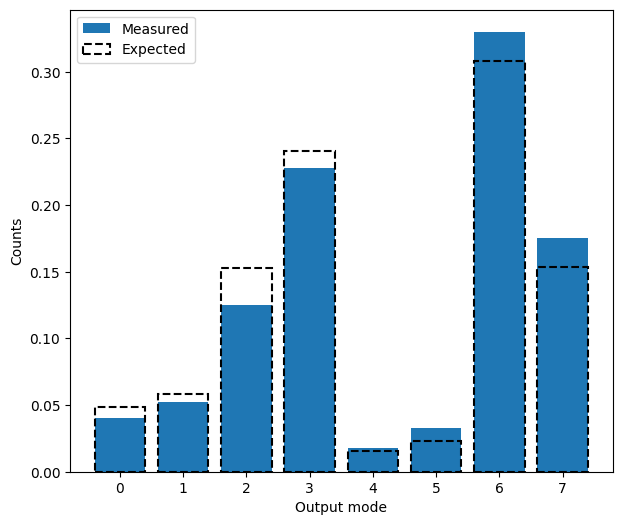

In [6]:
x = range(N)

# Convert counts to a list and normalise to total count numbers
p_calc = []
for i in x:
    p_calc.append(counts[i]/sum(counts.values()))

# Find expected distribution
counts_exp = {} # Setup dict to store counts
for i in range(N):
    counts_exp[i] = 0
# Loopover each state and add photons to counts, weighted by probability
for state, p in sampler.probability_distribution.items():
    for j in range(N):
        counts_exp[j] += p*state[j]
# Normalise so sum is 1
p_exp = []
for i in x:
    p_exp.append(counts_exp[i]/sum(counts_exp.values()))

# Plotting
plt.figure(figsize = (7,6))
plt.bar(x, p_calc, label = "Measured", alpha = 1)
plt.bar(x, p_exp, label = "Expected", edgecolor = "Black", fill = False,
        linestyle = "dashed", linewidth = 1.5)
plt.xlabel("Output mode")
plt.ylabel("Counts")
plt.legend()
plt.show()